### Data Analysis and Visualization
CA1 Index Generation and Visualization
Matthew Riddell - D00245674

### 1. Theoretical Framework

I wish to create a Country Healthy Index (CDI) to show which countries are the healthiest based on the following dimensions

Temp....

### Dimensions

<ul>
<li>Longevity</li>	
<li>Access to Care</li>	
<li>Health Outcomes</li>	
<li>Financial Risk</li>	
<li>Environmental Factors</li>		   
</ul>







### References:

World Data 2023, Kaggle Dataset
https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023





### 2. Data Selection

For the development of the Country Healthy Index, the following variables from the dataset will be used:

<ul>
<li><b>Life Expectancy:</b> Average number of years a newborn is expected to live.</li>
<li><b>Physicians per Thousand:</b> Number of physicians per thousand people.</li>
<li><b>Infant Mortality:</b> Number of deaths per 1,000 live births before reaching one year of age.</li>	
<li><b>Maternal Mortality Ratio:</b> Number of maternal deaths per 100,000 live births.</li>	
<li><b>Out of Pocket Health Expenditure (%):</b> Percentage of total health expenditure paid out-of-pocket by individuals</li>	
<li><b>CO2 Emissions:</b> Carbon dioxide emissions in tons.</li>
</ul>

Importing Dataset:

In [9]:
import pandas as pd

# loading dataset
file_path = "world-data-2023.csv"
df = pd.read_csv(file_path)

# printing the columns from the dataset
print("Available Columns:\n", df.columns.tolist())

# selection of relevant indicators for the Country Healthy Index (CHI)
selected_columns = [
    'Country',
    'Life expectancy',
    'Physicians per thousand',
    'Infant mortality',
    'Maternal mortality ratio',
    'Out of pocket health expenditure',
    'Co2-Emissions'
]

df_selected = df[selected_columns].copy()

# Rename variables for convenience 
df_selected = df_selected.rename(columns={
    'Life expectancy': 'life_expectancy',
    'Physicians per thousand': 'physicians_per_thousand',
    'Infant mortality': 'infant_mortality',
    'Maternal mortality ratio': 'maternal_mortality_ratio',
    'Out of pocket health expenditure': 'out_of_pocket_expenditure',
    'Co2-Emissions': 'co2_emissions'
})

# View the first few rows of the selected data
df_selected.head()


Available Columns:
 ['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code', 'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Currency-Code', 'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Largest city', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Official language', 'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']


,Country,life_expectancy,physicians_per_thousand,infant_mortality,maternal_mortality_ratio,out_of_pocket_expenditure,co2_emissions
0,Afghanistan,64.5,0.28,47.9,638.0,78.40%,"8,672"
1,Albania,78.5,1.20,7.8,15.0,56.90%,"4,536"
2,Algeria,76.7,1.72,20.1,112.0,28.10%,"150,006"
3,Andorra,NaN,3.33,2.7,NaN,36.40%,469
4,Angola,60.8,0.21,51.6,241.0,33.40%,"34,693"


### 3. Imputation of Missing Data

Checking selected variables for missing data

In [12]:
missing_values = df_selected.isnull().sum()
print(missing_values)

# handle numerical strings and convert to floats
df_selected['out_of_pocket_expenditure'] = (
    df_selected['out_of_pocket_expenditure']
    .str.rstrip('%')     
    .astype(float)        
)

df_selected['co2_emissions'] = (
    df_selected['co2_emissions']
    .astype(str)             
    .str.replace(',', '')     
    .astype(float)           
)

# fill missing values with mean avg values
df_selected.fillna(df_selected.mean(numeric_only=True), inplace=True)

# view cleaned data
print("\nCleaned Data (with filled values):")
print(df_selected.head())

print(missing_values)

Country                       0
life_expectancy               8
physicians_per_thousand       7
infant_mortality              6
maternal_mortality_ratio     14
out_of_pocket_expenditure     7
co2_emissions                 7
dtype: int64

Cleaned Data (with filled values):
       Country  life_expectancy  physicians_per_thousand  infant_mortality  \
0  Afghanistan        64.500000                     0.28              47.9   
1      Albania        78.500000                     1.20               7.8   
2      Algeria        76.700000                     1.72              20.1   
3      Andorra        72.279679                     3.33               2.7   
4       Angola        60.800000                     0.21              51.6   

   maternal_mortality_ratio  out_of_pocket_expenditure  co2_emissions  
0                638.000000                       78.4         8672.0  
1                 15.000000                       56.9         4536.0  
2                112.000000               

### 4. Multivariate Analysis

In [14]:
# imports 

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [15]:
# declare variables
country = df_selected['Country']
life_expectancy = df_selected['life_expectancy']
physicians_per_thousand = df_selected['physicians_per_thousand']
infant_mortality = df_selected['infant_mortality']
maternal_mortality_ratio = df_selected['maternal_mortality_ratio']
out_of_pocket_expenditure = df_selected['out_of_pocket_expenditure']
co2_emissions = df_selected['co2_emissions']

### Life Expectancy vs Physicians per Thousand

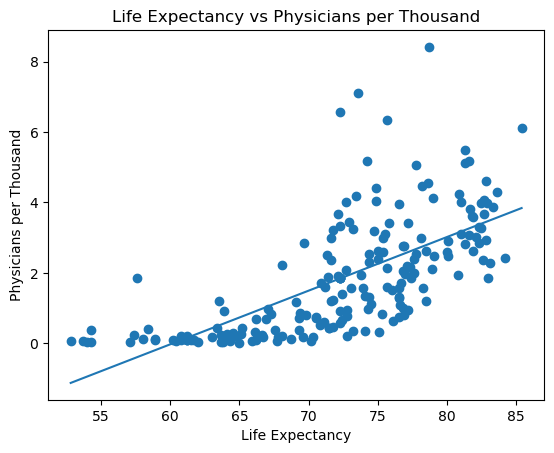

In [17]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Physicians per Thousand")
plt.xlabel("Life Expectancy")
plt.ylabel("Physicians per Thousand")
plt.scatter(life_expectancy, physicians_per_thousand)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, physicians_per_thousand, 1))(np.unique(life_expectancy)))

### Life Expectancy vs Infant Mortality

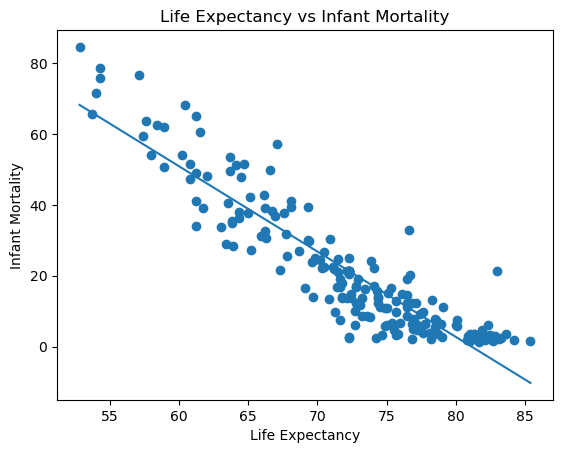

In [19]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Infant Mortality")
plt.xlabel("Life Expectancy")
plt.ylabel("Infant Mortality")
plt.scatter(life_expectancy, infant_mortality)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, infant_mortality, 1))(np.unique(life_expectancy)))

### Life Expectancy vs Maternal Mortality Ratio

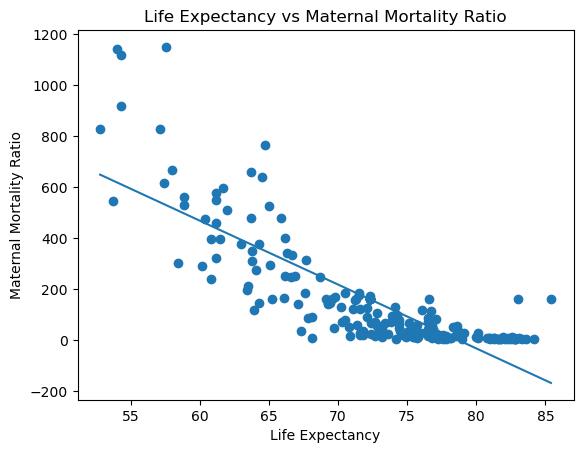

In [21]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Maternal Mortality Ratio")
plt.xlabel("Life Expectancy")
plt.ylabel("Maternal Mortality Ratio")
plt.scatter(life_expectancy, maternal_mortality_ratio)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, maternal_mortality_ratio, 1))(np.unique(life_expectancy)))

### Life Expectancy vs Out of Pocket Expenditure

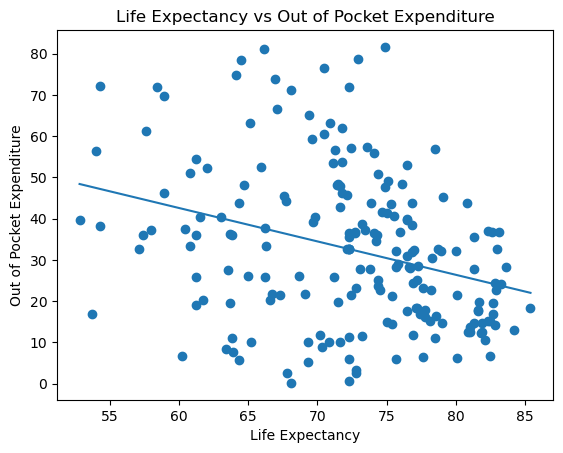

In [23]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs Out of Pocket Expenditure")
plt.xlabel("Life Expectancy")
plt.ylabel("Out of Pocket Expenditure")
plt.scatter(life_expectancy, out_of_pocket_expenditure)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, out_of_pocket_expenditure, 1))(np.unique(life_expectancy)))

### Life Expectancy vs CO2 Emissions

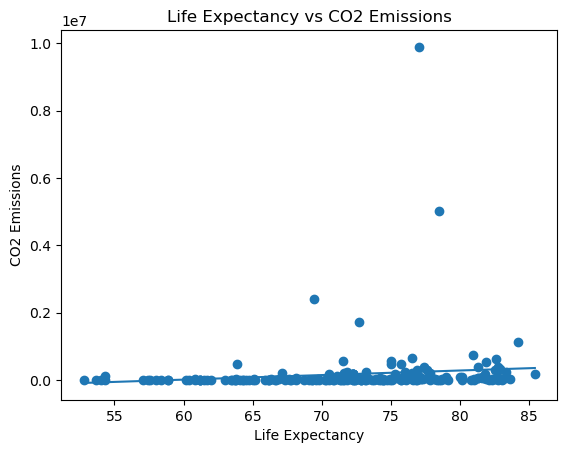

In [25]:
from matplotlib import pyplot as plt
plt.title("Life Expectancy vs CO2 Emissions")
plt.xlabel("Life Expectancy")
plt.ylabel("CO2 Emissions")
plt.scatter(life_expectancy, co2_emissions)
plt.plot(np.unique(life_expectancy), np.poly1d(np.polyfit(life_expectancy, co2_emissions, 1))(np.unique(life_expectancy)))

### Physicians Per Thousand vs Infant Mortality

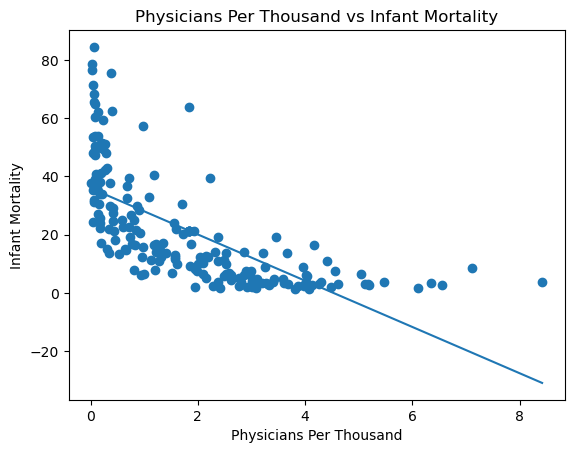

In [27]:
from matplotlib import pyplot as plt
plt.title("Physicians Per Thousand vs Infant Mortality")
plt.xlabel("Physicians Per Thousand")
plt.ylabel("Infant Mortality")
plt.scatter(physicians_per_thousand, infant_mortality)
plt.plot(np.unique(physicians_per_thousand), np.poly1d(np.polyfit(physicians_per_thousand, infant_mortality, 1))(np.unique(physicians_per_thousand)))

### Physicians Per Thousand vs Maternal Mortality Ratio

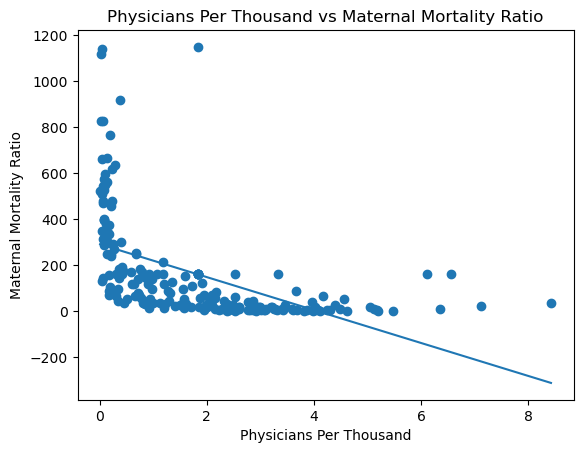

In [29]:
from matplotlib import pyplot as plt
plt.title("Physicians Per Thousand vs Maternal Mortality Ratio")
plt.xlabel("Physicians Per Thousand")
plt.ylabel("Maternal Mortality Ratio")
plt.scatter(physicians_per_thousand, maternal_mortality_ratio)
plt.plot(np.unique(physicians_per_thousand), np.poly1d(np.polyfit(physicians_per_thousand, maternal_mortality_ratio, 1))(np.unique(physicians_per_thousand)))

### Physicians Per Thousand vs Out of Pocket Expenditure

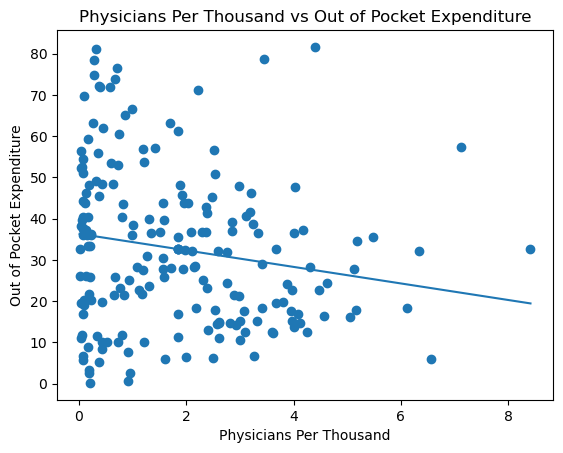

In [31]:
from matplotlib import pyplot as plt
plt.title("Physicians Per Thousand vs Out of Pocket Expenditure")
plt.xlabel("Physicians Per Thousand")
plt.ylabel("Out of Pocket Expenditure")
plt.scatter(physicians_per_thousand, out_of_pocket_expenditure)
plt.plot(np.unique(physicians_per_thousand), np.poly1d(np.polyfit(physicians_per_thousand, out_of_pocket_expenditure, 1))(np.unique(physicians_per_thousand)))

### Physicians Per Thousand vs CO2 Emissions

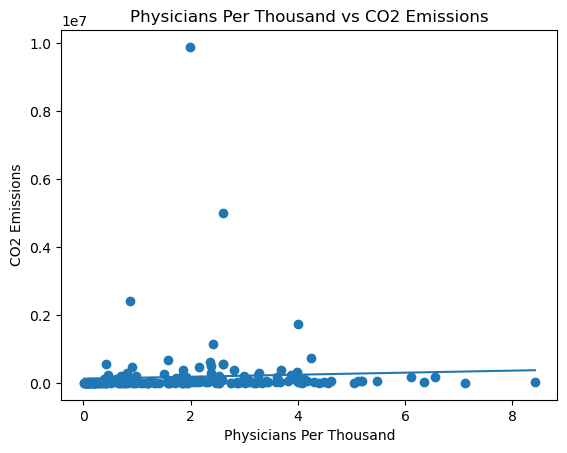

In [33]:
from matplotlib import pyplot as plt
plt.title("Physicians Per Thousand vs CO2 Emissions")
plt.xlabel("Physicians Per Thousand")
plt.ylabel("CO2 Emissions")
plt.scatter(physicians_per_thousand, co2_emissions)
plt.plot(np.unique(physicians_per_thousand), np.poly1d(np.polyfit(physicians_per_thousand, co2_emissions, 1))(np.unique(physicians_per_thousand)))

### Infant Mortality vs Maternal Mortality Ratio

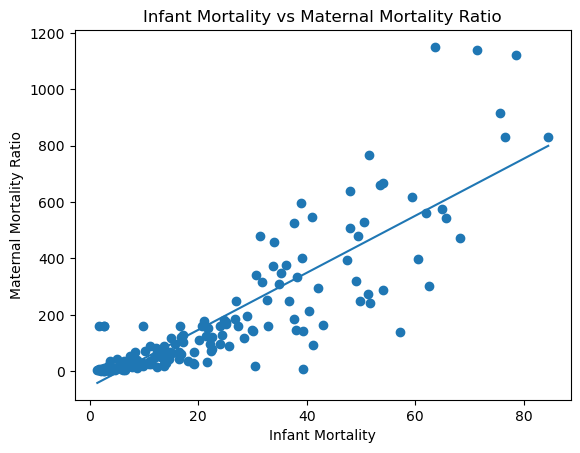

In [35]:
from matplotlib import pyplot as plt
plt.title("Infant Mortality vs Maternal Mortality Ratio")
plt.xlabel("Infant Mortality")
plt.ylabel("Maternal Mortality Ratio")
plt.scatter(infant_mortality, maternal_mortality_ratio)
plt.plot(np.unique(infant_mortality), np.poly1d(np.polyfit(infant_mortality, maternal_mortality_ratio, 1))(np.unique(infant_mortality)))

### Infant Mortality vs Out of Pocket Expenditure

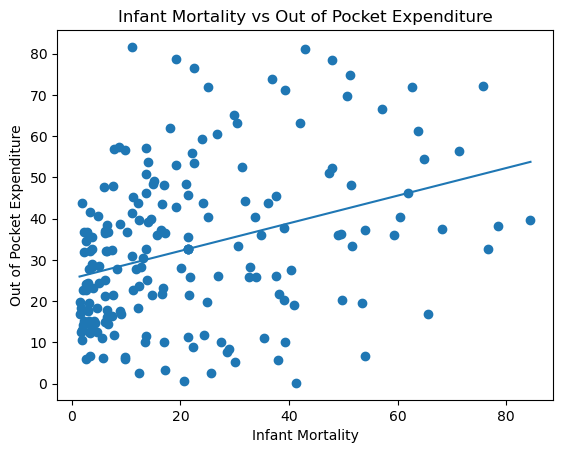

In [37]:
from matplotlib import pyplot as plt
plt.title("Infant Mortality vs Out of Pocket Expenditure")
plt.xlabel("Infant Mortality")
plt.ylabel("Out of Pocket Expenditure")
plt.scatter(infant_mortality, out_of_pocket_expenditure)
plt.plot(np.unique(infant_mortality), np.poly1d(np.polyfit(infant_mortality, out_of_pocket_expenditure, 1))(np.unique(infant_mortality)))

### Infant Mortality vs CO2 Emissions

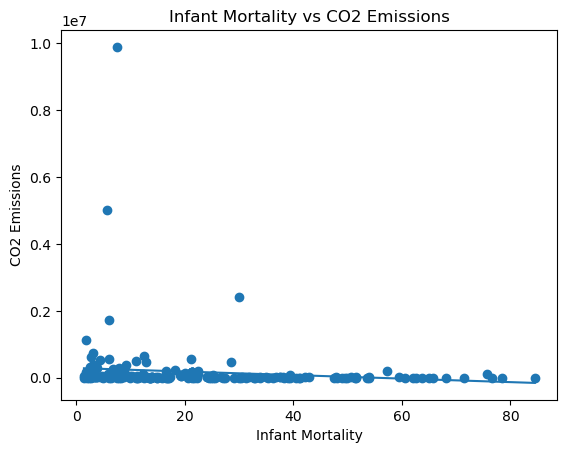

In [39]:
from matplotlib import pyplot as plt
plt.title("Infant Mortality vs CO2 Emissions")
plt.xlabel("Infant Mortality")
plt.ylabel("CO2 Emissions")
plt.scatter(infant_mortality, co2_emissions)
plt.plot(np.unique(infant_mortality), np.poly1d(np.polyfit(infant_mortality, co2_emissions, 1))(np.unique(infant_mortality)))

### Maternal Mortality Ratio vs Out of Pocket Expenditure

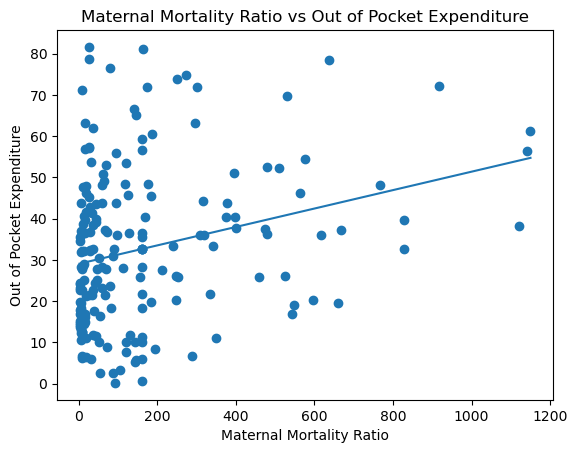

In [41]:
from matplotlib import pyplot as plt
plt.title("Maternal Mortality Ratio vs Out of Pocket Expenditure")
plt.xlabel("Maternal Mortality Ratio")
plt.ylabel("Out of Pocket Expenditure")
plt.scatter(maternal_mortality_ratio, out_of_pocket_expenditure)
plt.plot(np.unique(maternal_mortality_ratio), np.poly1d(np.polyfit(maternal_mortality_ratio, out_of_pocket_expenditure, 1))(np.unique(maternal_mortality_ratio)))

### Maternal Mortality Ratio vs CO2 Emissions

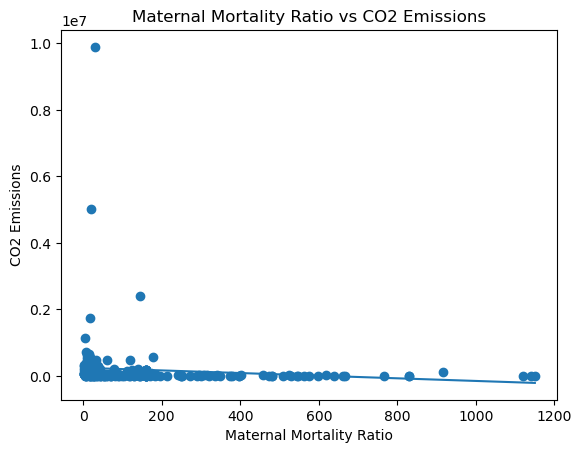

In [43]:
from matplotlib import pyplot as plt
plt.title("Maternal Mortality Ratio vs CO2 Emissions")
plt.xlabel("Maternal Mortality Ratio")
plt.ylabel("CO2 Emissions")
plt.scatter(maternal_mortality_ratio, co2_emissions)
plt.plot(np.unique(maternal_mortality_ratio), np.poly1d(np.polyfit(maternal_mortality_ratio, co2_emissions, 1))(np.unique(maternal_mortality_ratio)))

### Out of Pocket Expenditure vs CO2 Emissions

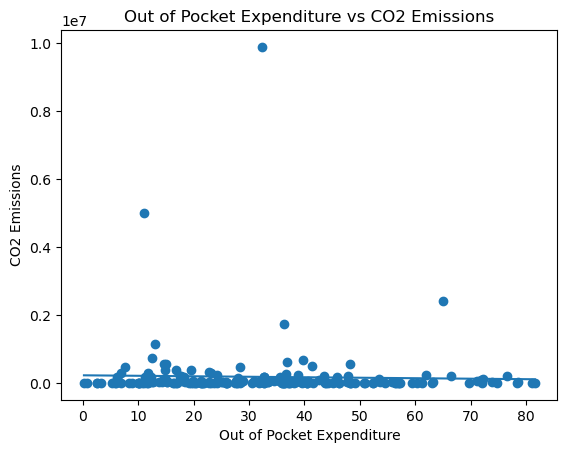

In [45]:
from matplotlib import pyplot as plt
plt.title("Out of Pocket Expenditure vs CO2 Emissions")
plt.xlabel("Out of Pocket Expenditure")
plt.ylabel("CO2 Emissions")
plt.scatter(out_of_pocket_expenditure, co2_emissions)
plt.plot(np.unique(out_of_pocket_expenditure), np.poly1d(np.polyfit(out_of_pocket_expenditure, co2_emissions, 1))(np.unique(out_of_pocket_expenditure)))

### Heatmap of correlations

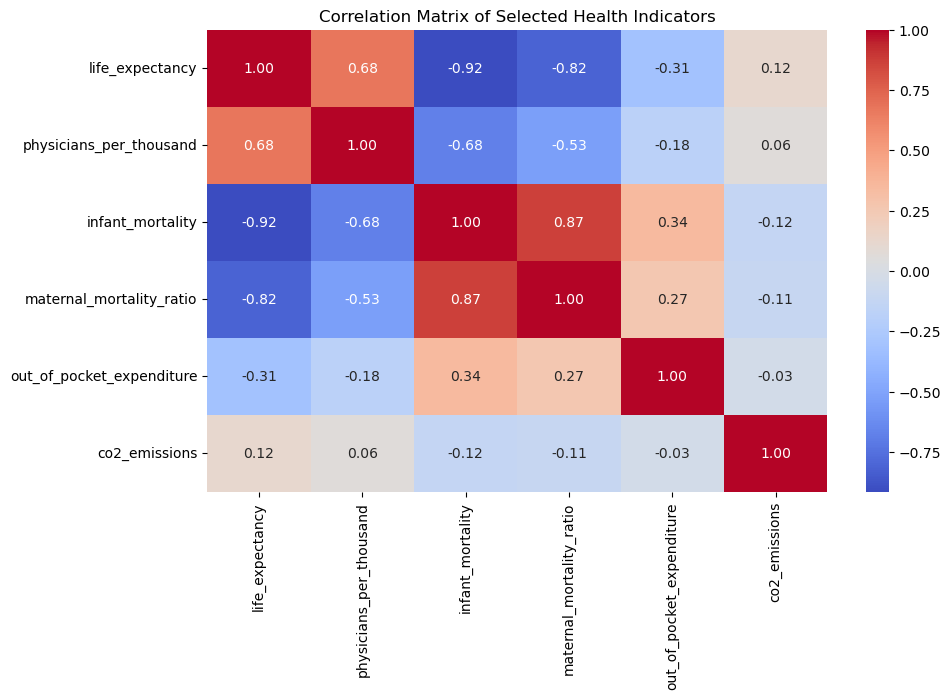

In [47]:
numeric_cols = df_selected.drop(columns=['Country'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Health Indicators")
plt.show()

Infant Mortality and Maternal Mortality Rate are almost the same 
Highly redundant

Dropping Maternal Mortality Rate from the selected variables

In [49]:
# Dropping redundant 'maternal_mortality_ratio'
df_selected.drop(columns=['maternal_mortality_ratio'], inplace=True)

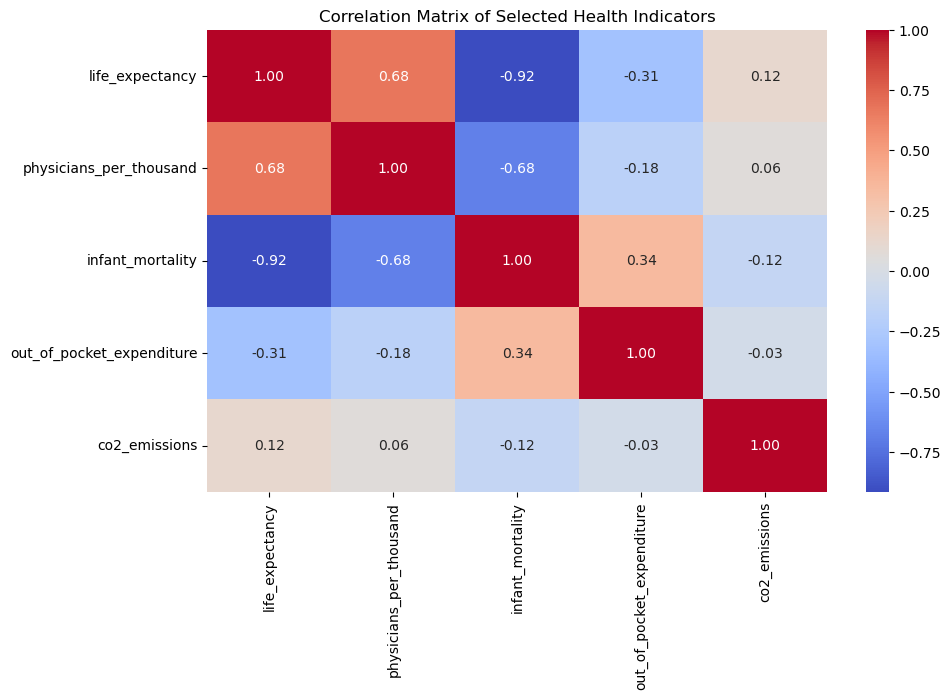

In [80]:
numeric_cols = df_selected.drop(columns=['Country'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Health Indicators")
plt.show()

### 5. Normalisation

### 6. Weighting and Aggregation

### 7. Uncertainty and Sensitivity Analysis

### 8. Back to the Data

### 9. Links to other Indicators

### 10. Visualisation of the Results